In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Loan prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
Loan_ID              600 non-null object
Gender               589 non-null object
Married              597 non-null object
Dependents           585 non-null object
Education            600 non-null object
Self_Employed        570 non-null object
ApplicantIncome      600 non-null int64
CoapplicantIncome    600 non-null float64
LoanAmount           578 non-null float64
Loan_Amount_Term     586 non-null float64
Credit_History       551 non-null float64
Property_Area        600 non-null object
Loan_Status          600 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 61.1+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               3
Dependents           15
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#LOAN STATUS
loan_status = df['Loan_Status'].value_counts()

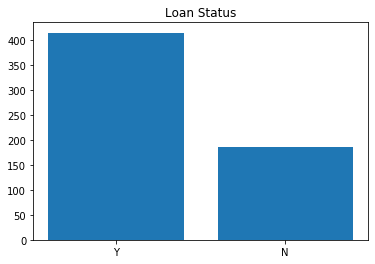

In [8]:
plt.bar(loan_status.index, loan_status)
plt.title('Loan Status')
plt.show()

In [9]:
#VISUALIZATION FOR COMPANY STAKEHOLDERS - Everyone needs money
property_and_loan = df.groupby(['Property_Area','Loan_Status']).size().unstack()

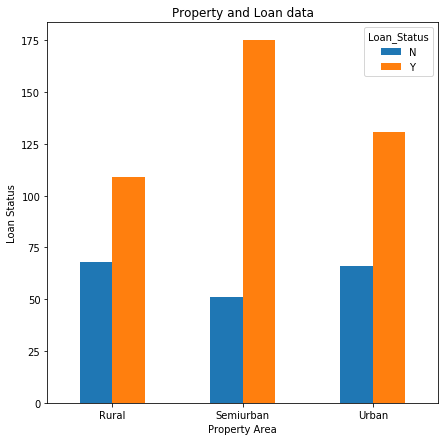

In [10]:
property_and_loan.plot(kind='bar',stacked=False,figsize=(7,7))
plt.title('Property and Loan data')
plt.xlabel('Property Area')
plt.ylabel('Loan Status')
plt.xticks(rotation=360)
plt.show()

In [11]:
#VISUALIZATION FOR COMPANY STAKEHOLDERS - Expensive Education
education_and_loan = df.groupby(['Education','Loan_Status']).size().unstack()

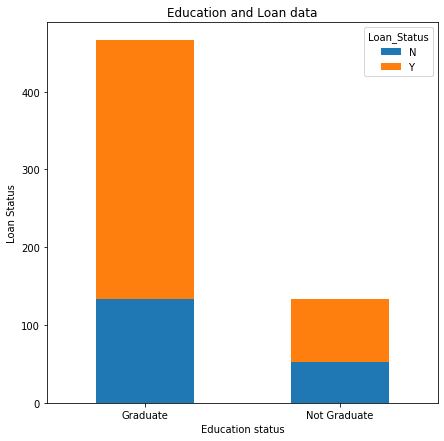

In [12]:
education_and_loan.plot(kind='bar',stacked=True,figsize=(7,7))
plt.title('Education and Loan data')
plt.xlabel('Education status')
plt.ylabel('Loan Status')
plt.xticks(rotation=360)
plt.show()

In [13]:
#VISUALIZATION FOR COMPANY STAKEHOLDERS - Smarter or richer
graduate = df[df['Education']=='Graduate']
not_graduate = df[df['Education']=='Not Graduate']

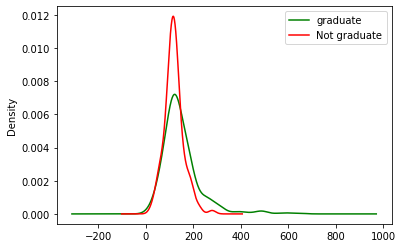

In [14]:
graduate['LoanAmount'].plot(kind='density',label='graduate', color='green')
not_graduate['LoanAmount'].plot(kind='density',label='Not graduate', color='red')
plt.legend()
plt.show()

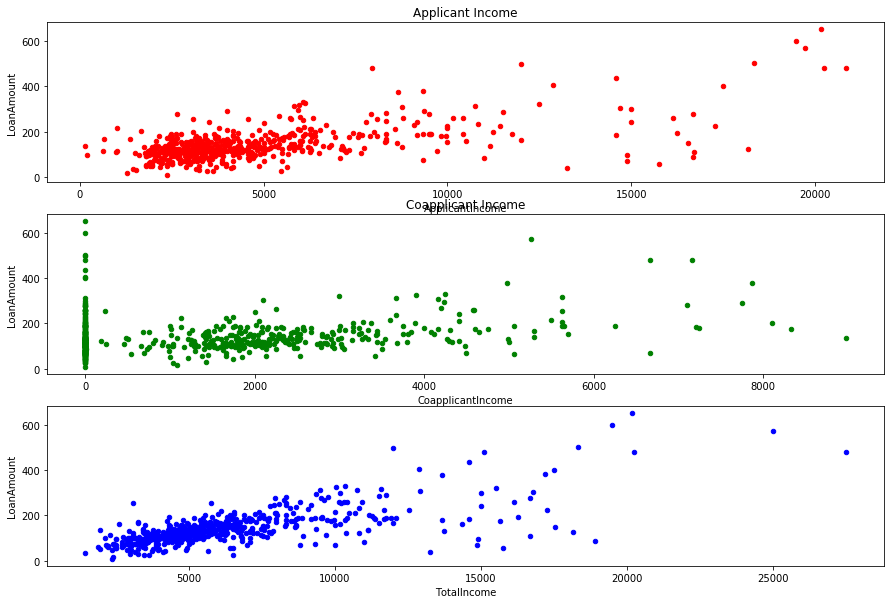

In [15]:
#VISUALIZATION FOR COMPANY STAKEHOLDERS - Income vs Loan
fig ,(ax_1,ax_2,ax_3) = plt.subplots(3,1,figsize=(15,10))

df.plot.scatter(x='ApplicantIncome',y='LoanAmount', color='red', ax=ax_1)
ax_1.set_title('Applicant Income')

df.plot.scatter(x='CoapplicantIncome',y='LoanAmount', color='green', ax=ax_2)
ax_2.set_title('Coapplicant Income')


df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

df.plot.scatter(x='TotalIncome',y='LoanAmount', color='blue', ax=ax_3)

plt.show()